<a href="https://colab.research.google.com/github/Oluwadeborah/Data-science-project/blob/main/Deborah_Ojo_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3MTT CAPSTONE PROJECT

### Project Done By: Deborah

## PROBLEM STATEMENT






### Introduction
Analysis of the "covid_19_clean_complete.csv” Dataset

The COVID-19 pandemic has had a significant impact on global health, economies, and societies. This analysis aims to explore the "covid_19_clean_complete.csv” dataset to extract meaningful insights about the pandemic’s spread, mortality rates, and recovery patterns across different countries. By utilizing advanced data analysis techniques, statistical methods, and machine learning models, we seek to understand the underlying factors affecting COVID-19 outcomes and provide recommendations for future policy-making and research.




### **Project Phases**

#### **Phase1- Data Acquisition and Preparation**

[Download Data Here]("https://drive.google.com/drive/folders/1TVnepg5yQyumIjw4Yp9ZOssnoaweOvu1?usp=drive_link")

#### **Task 1.1 Import All The Relevant Libraries and Dependenccies**





In [ ]:
# Libraries for data manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
####################################
# Libraries for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import

#### **Task 1.2 Load in all the datasets**
Loading the datasets into a suitable data structure (like a Pandas DataFrame in Python) is the crucial first step to actually working with the data. This enables one to:
View and explore the data.
Clean and preprocess it for analysis (handling missing values, data type conversions, etc.).
Select, filter, and manipulate specific parts of the data as needed.



In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Instructor's copy /Copy of country_wise_latest.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Instructor's copy /Copy of covid_19_clean_complete.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Instructor's copy /Copy of day_wise.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Instructor's copy /Copy of full_grouped (1).csv")
df5 = pd.read_csv("/content/drive/MyDrive/Instructor's copy /Copy of usa_county_wise.csv")
df6 = pd.read_csv("/content/drive/MyDrive/Copy of worldometer_data.csv")

In [ ]:
df1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
df1.shape

(187, 15)

In [ ]:
df1.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [ ]:
df1[df1['Country/Region'] == "Nigeria"]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
124,Nigeria,41180,860,18203,22117,648,2,829,2.09,44.2,4.72,37225,3955,10.62,Africa


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df2.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


####Data Cleaning Handling Missing Values
Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in dataset to improve its quality and reliability for analysis.




In [ ]:
# Check for missing values
print(df2.isnull().sum())

# Convert 'Date' column to datetime format
df2['Date'] = pd.to_datetime(df2['Date'])

# Check the data types and the first few rows again after conversion
print(df2.dtypes)


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64
Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object


In [ ]:
 #Drop rows with missing 'Province/State'
df2 = df2.dropna(subset=['Province/State'])
# Check the result
print(df2.isnull().sum())

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


In [ ]:
#To return a tuple containing two values (number of rows and number of columns)

df2.shape

(14664, 10)

In [ ]:
#To show/display the last 5 rows
df2.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49052,Anguilla,United Kingdom,18.2206,-63.0686,2020-07-27,3,0,3,0,Europe
49053,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe
49059,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe
49060,Saint Pierre and Miquelon,France,46.8852,-56.3159,2020-07-27,4,0,1,3,Europe


In [ ]:
#vertical variables that hold the data
df2.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
#to identify and list the unique element in an array
df2['Country/Region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'Greenland', 'France',
       'Netherlands', 'United Kingdom'], dtype=object)

In [ ]:
df2.duplicated().sum()

0

In [ ]:
nig = df2[df2["Country/Region"] =='Nigeria']

In [ ]:
nig["Province/State"].unique()

array([], dtype=object)

In [ ]:
nig["Confirmed"].value_counts()

,count
Confirmed,


In [ ]:
df2['Death_Rate'] = df2['Deaths'] / df2['Confirmed'] * 100
df2['Recovery_Rate'] = df2['Recovered'] / df2['Confirmed'] * 100

In [ ]:
df3.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [ ]:
df4.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [ ]:
df4[df4['Country/Region'] == "Nigeria"]

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
124,2020-01-22,Nigeria,0,0,0,0,0,0,0,Africa
311,2020-01-23,Nigeria,0,0,0,0,0,0,0,Africa
498,2020-01-24,Nigeria,0,0,0,0,0,0,0,Africa
685,2020-01-25,Nigeria,0,0,0,0,0,0,0,Africa
872,2020-01-26,Nigeria,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
34345,2020-07-23,Nigeria,38948,833,16061,22054,604,20,246,Africa
34532,2020-07-24,Nigeria,39539,845,16559,22135,591,12,498,Africa
34719,2020-07-25,Nigeria,39977,856,16948,22173,438,11,389,Africa
34906,2020-07-26,Nigeria,40532,858,17374,22300,555,2,426,Africa


In [ ]:
#df4[df4['Country/Region'] == "Nigeria"

In [ ]:
#number of unique value in each column.
df4.Confirmed.nunique()

10732

In [ ]:
conf = df4.groupby('Country/Region').Confirmed.value_counts()
conf.head(20)

Country/Region  Confirmed
Afghanistan     0            33
                1            13
                7             3
                22            3
                4             2
                24            2
                40            2
                110           2
                5             1
                11            1
                16            1
                21            1
                74            1
                84            1
                94            1
                120           1
                170           1
                174           1
                237           1
                273           1
Name: count, dtype: int64

In [ ]:
df4.Confirmed.tail(20)

,Confirmed
35136,3297
35137,24
35138,874
35139,148
35140,1455
35141,227019
35142,4290259
35143,1128
35144,67096
35145,59177


In [ ]:
df5.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [ ]:
df6.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
df2['Death_Rate'] = df2['Deaths'] / df2['Confirmed'] * 100
df2['Recovery_Rate'] = df2['Recovered'] / df2['Confirmed'] * 100

In [ ]:
pip install matplotlib

####Exploratory Data Analysis (EDA)
Descriptive Statistics

-The .descibe() method provides a statistical summary, including mean, median, standard deviation, and quartiles,giving one a good understanding of the data distribution.
It also provides a summary of the central tendency, dispersion, and shape of the distribution of your numerical data.

In [ ]:
# Statistical summary
df2.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Death_Rate,Recovery_Rate
count,14664.000000,14664.000000,14664,14664.000000,14664.000000,14664.000000,14664.000000,12561.000000,12561.000000
mean,24.399387,38.808982,2020-04-24 12:00:00.000000256,1717.704446,95.505046,865.607679,756.591721,1.943660,61.103112
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000,0.000000,0.000000,-14.000000,0.000000,0.000000
25%,17.900000,-63.050100,2020-03-08 18:00:00,10.000000,0.000000,0.000000,0.000000,0.000000,3.030303
50%,30.796350,102.098650,2020-04-24 12:00:00,142.000000,1.000000,27.000000,4.000000,0.791557,86.206897
75%,43.666100,116.414200,2020-06-10 06:00:00,554.000000,6.000000,234.000000,59.000000,1.829268,98.453608
max,71.706900,165.618042,2020-07-27 00:00:00,68135.000000,5667.000000,64435.000000,53061.000000,100.000000,100.000000
std,27.888920,94.424973,NaN,8523.573314,589.281516,6195.703246,4719.014122,3.775439,42.164443


####Visualization of Key Variables
####Top 10 Countries by Confirmed Cases
We identify countries with the highest number of confirmed cases.
Visualizing this data highlights the most affected regions

In [ ]:
# Top 10 countries
top_confirmed = df2.nlargest(10, 'Confirmed')
display(top_confirmed)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Death_Rate,Recovery_Rate
30598,Hubei,2,30.9756,112.2707,737563,68135,4512,63616,7,2,6.622147,93.367579
30859,Hubei,2,30.9756,112.2707,737564,68135,4512,63616,7,2,6.622147,93.367579
31120,Hubei,2,30.9756,112.2707,737565,68135,4512,63616,7,2,6.622147,93.367579
31381,Hubei,2,30.9756,112.2707,737566,68135,4512,63616,7,2,6.622147,93.367579
31642,Hubei,2,30.9756,112.2707,737567,68135,4512,63616,7,2,6.622147,93.367579
31903,Hubei,2,30.9756,112.2707,737568,68135,4512,63616,7,2,6.622147,93.367579
32164,Hubei,2,30.9756,112.2707,737569,68135,4512,63617,6,2,6.622147,93.369047
32425,Hubei,2,30.9756,112.2707,737570,68135,4512,63617,6,2,6.622147,93.369047
32686,Hubei,2,30.9756,112.2707,737571,68135,4512,63618,5,2,6.622147,93.370514
32947,Hubei,2,30.9756,112.2707,737572,68135,4512,63618,5,2,6.622147,93.370514


In [ ]:
# Top 10 countries
top_confirmed = df4.nlargest(10, 'Confirmed')
display(top_confirmed)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35142,2020-07-27,US,4290259,148011,1325804,2816444,56336,1076,27941,Americas
34955,2020-07-26,US,4233923,146935,1297863,2789125,54953,470,18449,Americas
34768,2020-07-25,US,4178970,146465,1279414,2753091,66439,905,17790,Americas
34581,2020-07-24,US,4112531,145560,1261624,2705347,73715,1130,28355,Americas
34394,2020-07-23,US,4038816,144430,1233269,2661117,68695,1114,22420,Americas
34207,2020-07-22,US,3970121,143316,1210849,2615956,70910,1195,28831,Americas
34020,2020-07-21,US,3899211,142121,1182018,2575072,64534,1096,21931,Americas
33833,2020-07-20,US,3834677,141025,1160087,2533565,61417,491,28966,Americas
33646,2020-07-19,US,3773260,140534,1131121,2501605,61847,415,8401,Americas
33459,2020-07-18,US,3711413,140119,1122720,2448574,63698,853,15516,Americas


In [ ]:
# Top 10 countries
top_confirmed = df1.nlargest(10, 'Confirmed')
display(top_confirmed)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


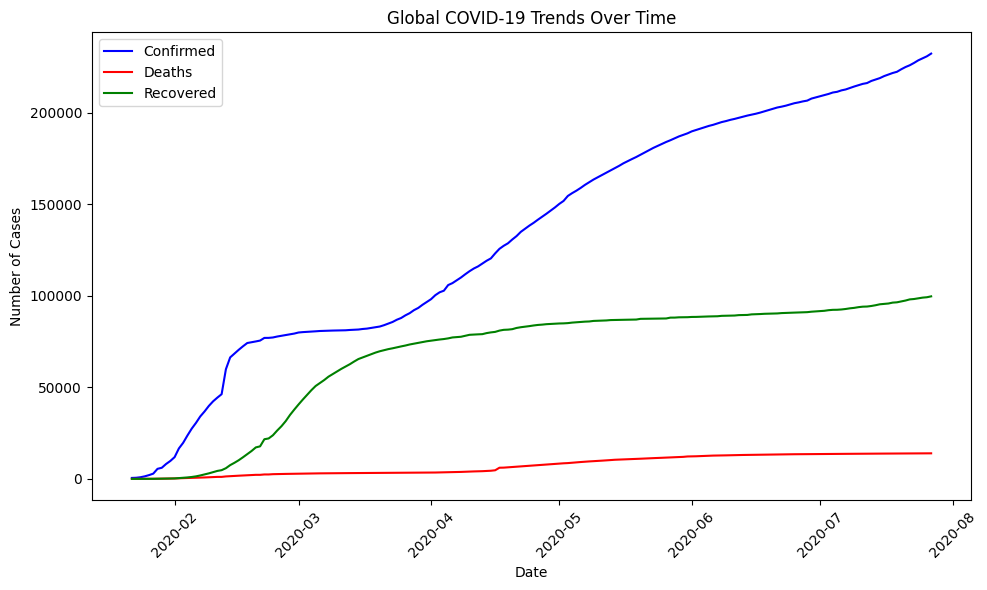

In [ ]:
import matplotlib.pyplot as plt

# Grouping the data by date and summing up the confirmed, deaths, and recovered cases
df2_grouped = df2.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plotting the trends
plt.figure(figsize=(10, 6))
plt.plot(df2_grouped.index, df2_grouped['Confirmed'], label='Confirmed', color='blue')
plt.plot(df2_grouped.index, df2_grouped['Deaths'], label='Deaths', color='red')
plt.plot(df2_grouped.index, df2_grouped['Recovered'], label='Recovered', color='green')

# Adding titles and labels
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

####Correlation Analysis

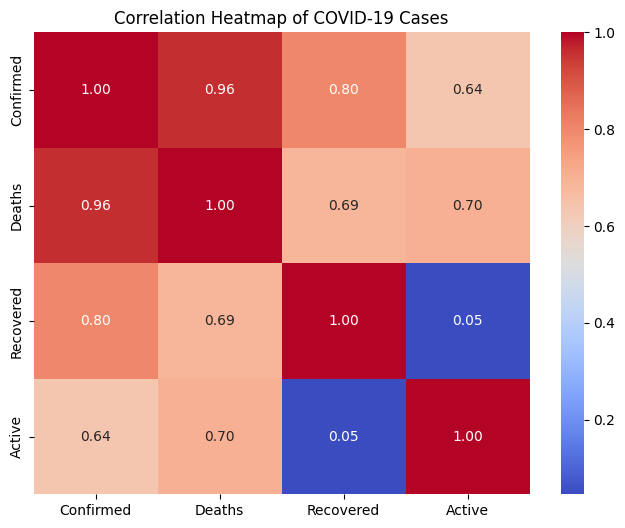

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for correlation analysis
correlation_data = df2[['Confirmed', 'Deaths', 'Recovered', 'Active']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of COVID-19 Cases')
plt.show()

####MACHINE LEARNING MODELS


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Preprocessing: We will predict 'Confirmed' cases based on 'Date' and 'Country/Region'
df2['Date'] = pd.to_datetime(df2['Date'])  # Ensure Date is in datetime format
df2['Date'] = df2['Date'].map(lambda x: x.toordinal())  # Convert date to ordinal for use in the model

# Select relevant columns for the model
X = df2[['Date', 'Country/Region']]  # Features: Date and Country
y = df2['Confirmed']  # Target: Confirmed cases

# Convert categorical column ('Country/Region') to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Country/Region'] = le.fit_transform(X['Country/Region'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-Squared (R2): {r2}')

Mean Squared Error (MSE): 85278289.92714801
Root Mean Squared Error (RMSE): 9234.62451468104
R-Squared (R2): 0.023443841480916272


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Convert categorical data 'Country/Region' into numeric
le = LabelEncoder()  # Initialize LabelEncoder
df2['Country/Region'] = le.fit_transform(df2['Country/Region'])

# Select features
features = ['Lat', 'Long', 'Deaths', 'Recovered', 'Active', 'Country/Region']
X = df2[features]
y = df2['Confirmed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")

Random Forest Model Evaluation:
Mean Squared Error (MSE): 57403.464200340924
Root Mean Squared Error (RMSE): 239.59020055156873
R-Squared (R2): 0.999342649734967


Mean Squared Error (MSE): 1060867.2329479952
Root Mean Squared Error (RMSE): 1029.9840935412524
R-Squared (R2): 0.9878515806239607


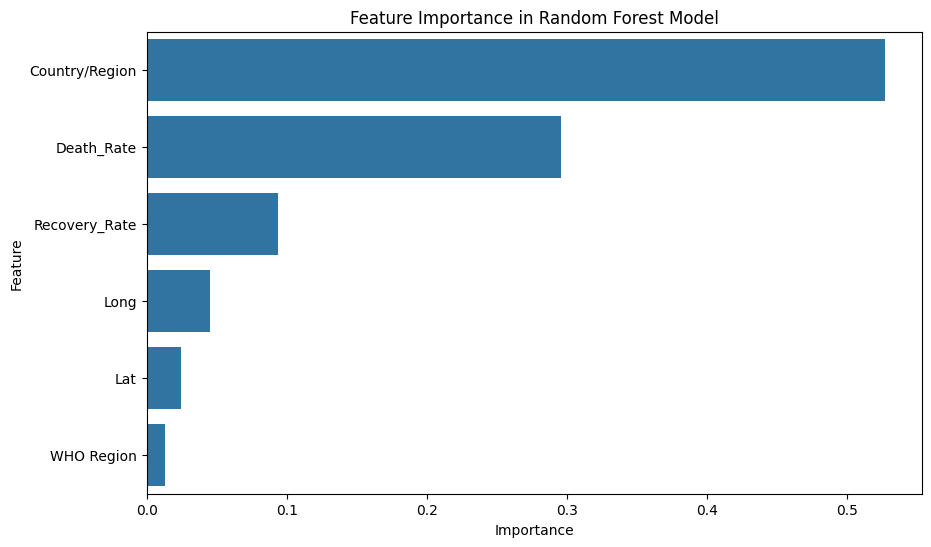

In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numerical
df2['Country/Region'] = le.fit_transform(df2['Country/Region'])
df2['WHO Region'] = le.fit_transform(df2['WHO Region'])

# Features and target variable
X = df2.drop(columns=['Confirmed', 'Deaths', 'Recovered', 'Active', 'Date', 'Province/State'])
y = df2['Confirmed']  # Target variable can be 'Confirmed', 'Deaths', or 'Recovered'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")

# Plot feature importance
feature_importances = rf_model.feature_importances_

# Create a dataframe for feature importance
feature_df2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
# Sort the features by importance
feature_df2 = feature_df2.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df2)
plt.title("Feature Importance in Random Forest Model")
plt.show()

In [ ]:
#Make predictions on the test data
y_pred_test = rf_model.predict(X_test)

# Create a DataFrame to compare actual and predicted values
comparison_df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Display the first few rows to compare
print(comparison_df2.head())

# Optionally, evaluate using metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error (MSE) on Test Data: {mse_test}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse_test}")
print(f"R-Squared (R2) on Test Data: {r2_test}")

       Actual     Predicted
10737       9      5.342443
14168     133    187.889857
29536   40732  42378.930000
22924     484    649.540000
8344        0      0.244438
Mean Squared Error (MSE) on Test Data: 1060867.2329479952
Root Mean Squared Error (RMSE) on Test Data: 1029.9840935412524
R-Squared (R2) on Test Data: 0.9878515806239607


In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Ensure the data is preprocessed
# X and y represent features and target variable
# Assuming 'df2' is your dataframe
X = df2[['Country/Region', 'Lat', 'Long', 'Deaths', 'Recovered', 'Active']]  # Feature columns
y = df2['Confirmed']  # Target variable
# Convert categorical feature 'Country/Region' to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Country/Region'] = le.fit_transform(X['Country/Region'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=100,
                             learning_rate=0.05,
                             max_depth=5,
                             random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")

Mean Squared Error (MSE): 142290.8486105056
Root Mean Squared Error (RMSE): 377.2145922555298
R-Squared (R2): 0.9983705878257751


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Retrain the model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred_optimized = best_xgb_model.predict(X_test)

# Evaluate the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error (MSE): {mse_optimized}")
print(f"Optimized Root Mean Squared Error (RMSE): {rmse_optimized}")
print(f"Optimized R-Squared (R2): {r2_optimized}")

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Optimized Mean Squared Error (MSE): 120560.28408024316
Optimized Root Mean Squared Error (RMSE): 347.2179201600101
Optimized R-Squared (R2): 0.9986194372177124


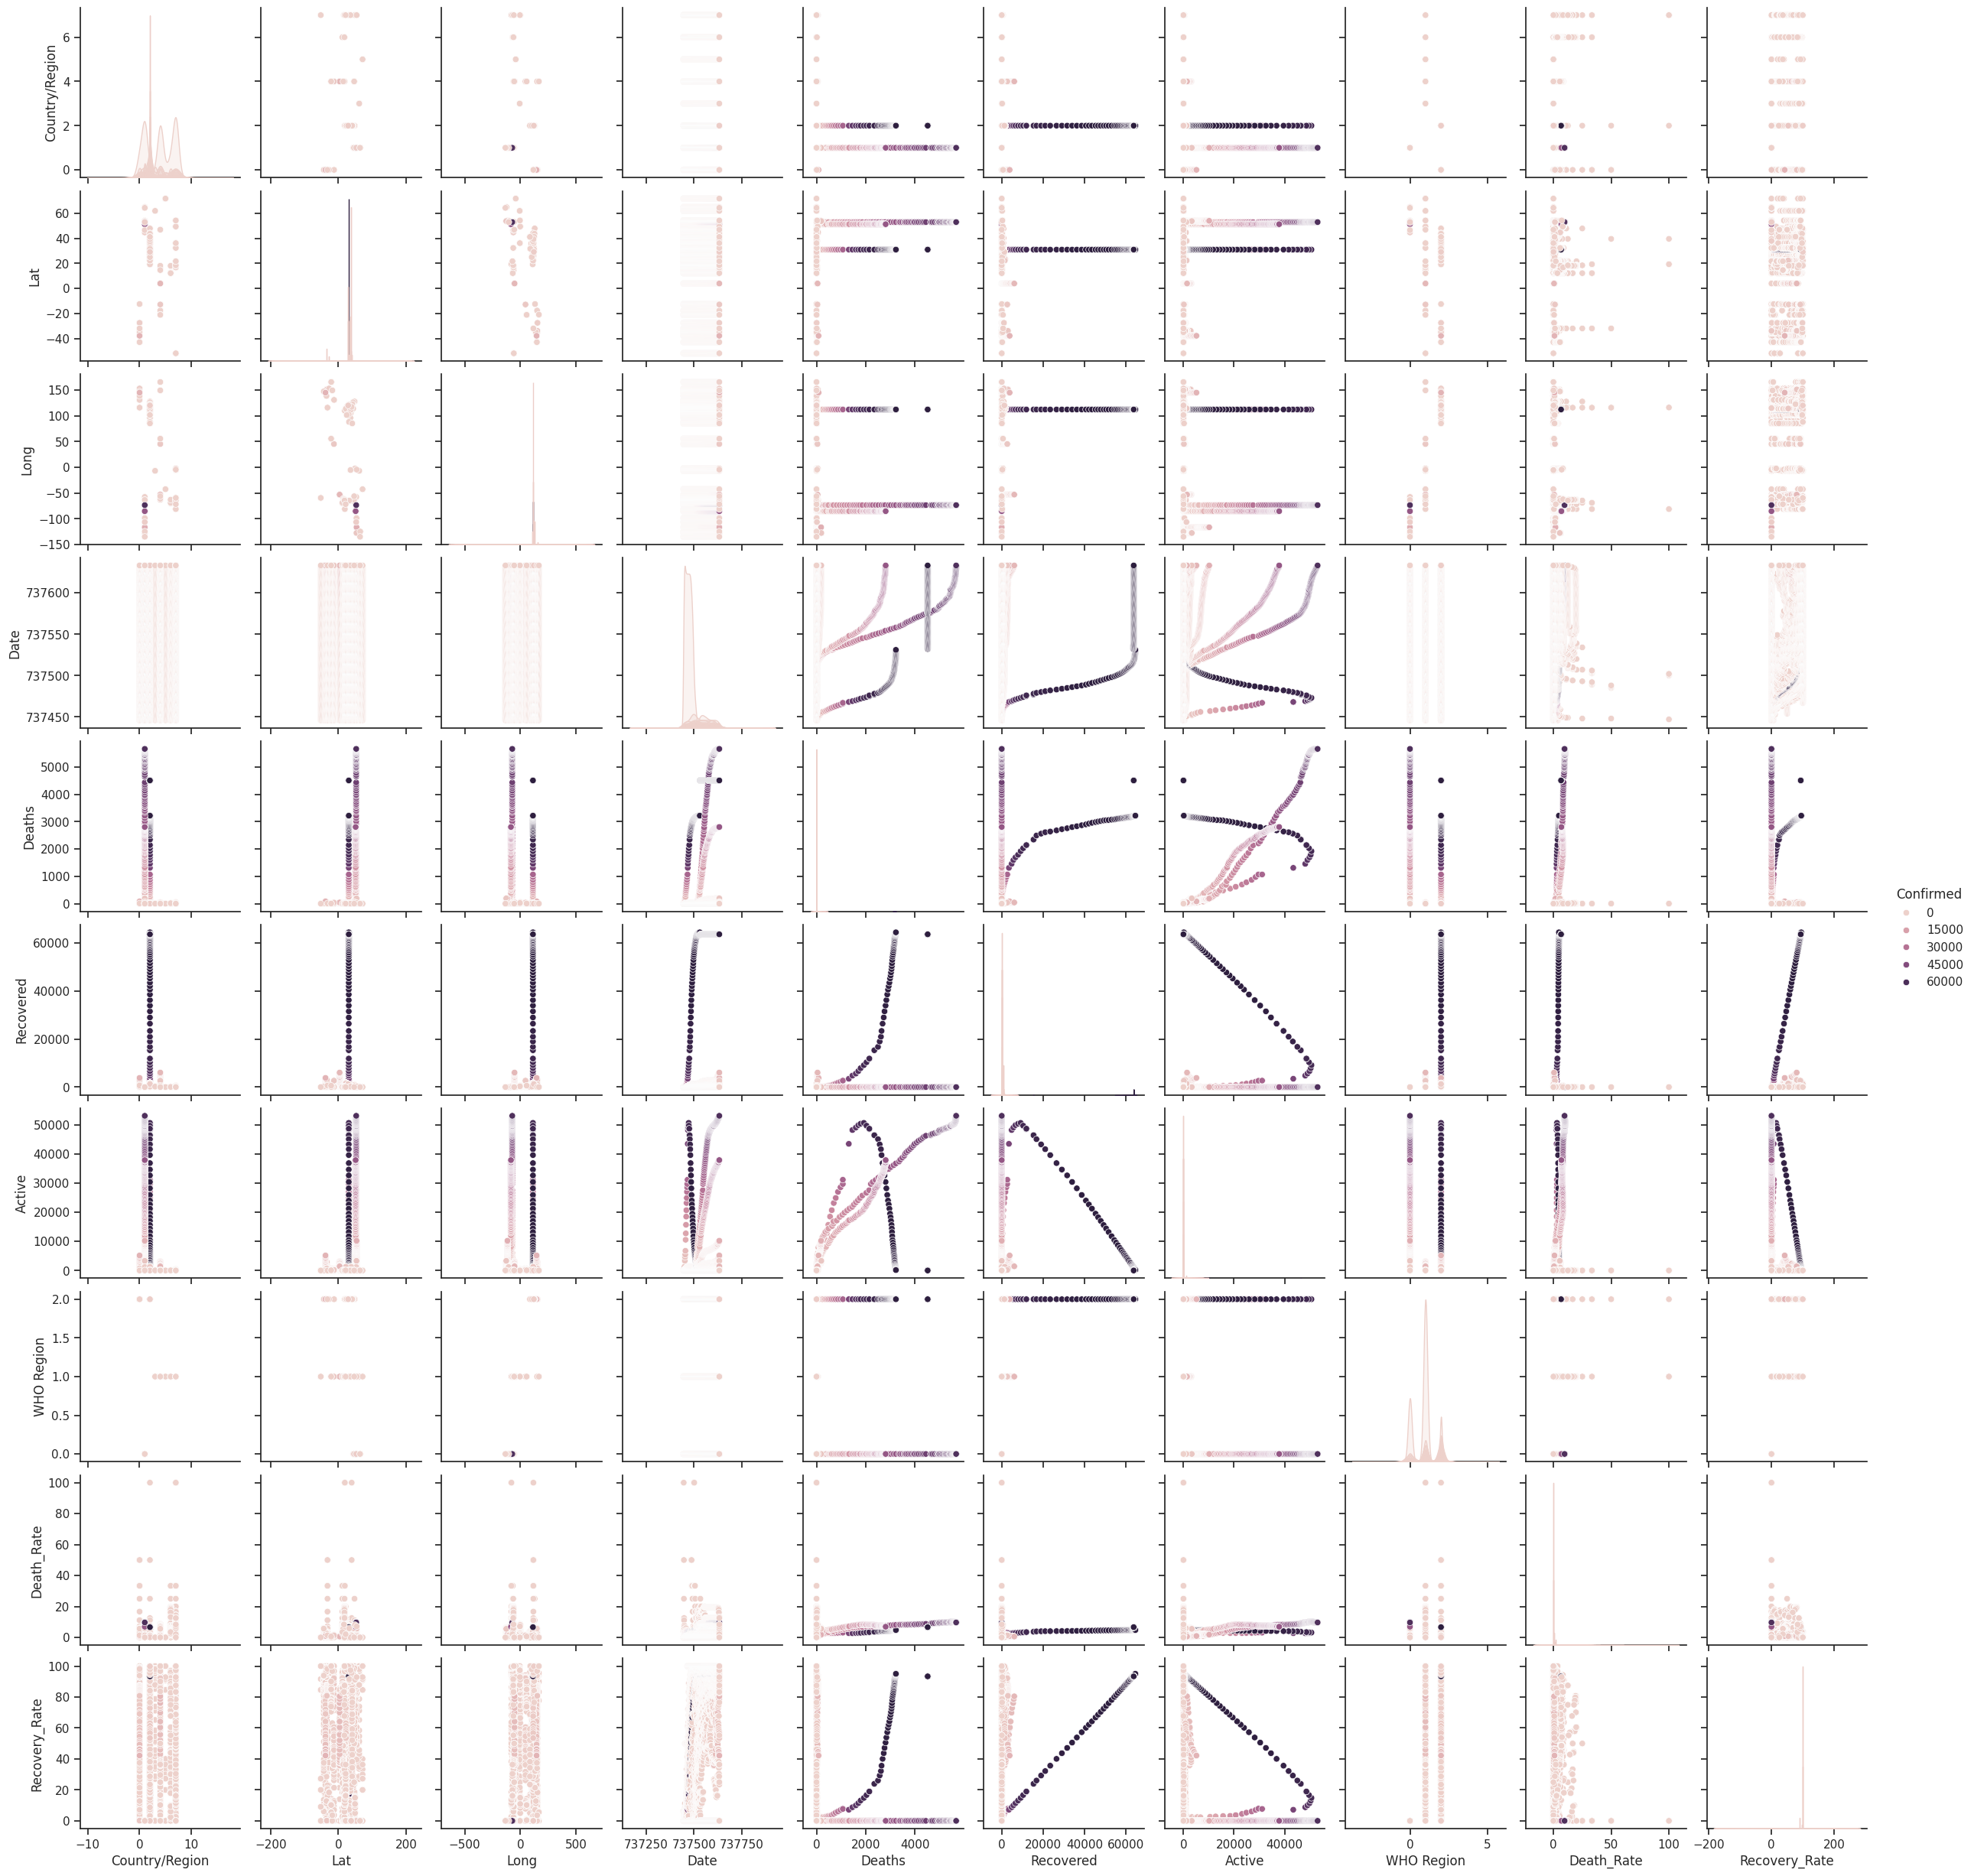

In [ ]:
# we are using pair plot using seaborn
sns.set(style="ticks", color_codes=True) # the "ticks" is for setting the style of the axis
sns.pairplot(df2, hue="Confirmed")

####PREDICTIVE MODELLING
Predictive modeling is a statistical technique used to build models that can predict future outcomes based on historical data.

In [ ]:
# Feature Selection
X = df2[['Confirmed', 'Recovered', 'Active']]
y = df2['Deaths']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)
# Model Evaluation
# Coefficients
coeff_df2= pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n",coeff_df2)
# R-squared value
r_squared = model.score(X_test, y_test)
print(f"\nR-squared: {r_squared:.4f}")


            Coefficient
Confirmed          1.0
Recovered         -1.0
Active            -1.0

R-squared: 1.0000


####PROGRESS REPORT ON COVID-19 PREDICTIVE MODELING PROJECT

I've been working  dilligently on the "COVID-19 Predictive Modeling for Public Health" project for Health Guard Analytics, and it has been quite an insightful journey.
The primary goal is to build a model that helps predict COVID-19 case trends, allowing public health officials to allocate resources and inform policies effectively.
Below is the breakdown of my progress so far:

**Data Collection and Preparation:**

I sourced the dataset from COVID-19 Open Research Dataset (CORD-19) on Kaggle. The dataset is extensive, containing case counts, demographics, and various health metrics.
I performed data cleaning, including handling missing values and duplicates. I standardized the date and location formats to ensure consistency across the entries.

**Exploratory Data Analysis (EDA):**

Through visualizations like line plots, bar charts, and scatter plots, I explored trends in COVID-19 cases, deaths and recoveries.

**Predictive Modeling:**

I have developed and evaluated two machine learning models so far: Linear Regression and Random Forest.
For Linear Regression, while the initial results were not as expected with a low R-squared value, the Random Forest model yielded much more promising results.

The Random Forest model performed significantly better, showing an R-squared value close to 1(0.999), indicating a strong predictive capability on the training data.

Testing the model on unseen data provided an R-squared of approximately 0.49, which highlights that there's still room for improvement, especially in making the model generalize better to new cases.

**Next Steps:**

I'll refine the Random Forest model further by fine-tuning the hyperparameters and possibly introducing additional features for even greater accuracy.

I'll also explore time-series models to capture the temporal dynamics of COVID-19 spread.
